# Magnetic field of a circular current loop

According to [Hampton et
al](https://pubs.aip.org/aip/adv/article/10/6/065320/997382/Closed-form-expressions-for-the-magnetic-fields-of),
a circular loop in $(x,y)$ plane centered at the origin with radius
*a* created the field in cylindrical coordinates $(r,\theta,z)$ is

$$B_r=\frac{B_aaz}{\pi r\sqrt{(a+r)^2+z^2}}\left(\frac{a^2+r^2+z^2}{(a-r)^2+z^2}E(m)-K(m)\right),$$
$$B_z=\frac{B_aa}{\pi\sqrt{(a+r)^2+z^2}}\left(\frac{a^2+r^2+z^2}{(a-r)^2+z^2}E(m)+K(m)\right),$$
$$B_{\theta}=0,$$
$$m=\frac{4ar}{(a+r)^2+z^2},$$

The factor $B_a=\mu_0I/(2a)$ is the field at the center of the loop, and $I$ is the loop current.

$K(m)$ and $E(m)$ are complete elliptic integrals of [the
first](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.ellipk.html) and [the
second](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.ellipe.html#scipy.special.ellipe)
kind.  For $m\ll 1$, $K(m)=(\pi/2)(1+m^2/O(m^4))$ and $E(m)=(\pi/2)(1-m^2/4+O(m^4))$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk, ellipe

# Generate a range of 'm' values (parameter of the elliptic integral)
# 'm' must be between 0 and 1 for real values of complete elliptic integrals
m_values = np.linspace(0, 1, 100)

# Calculate the values of the complete elliptic integrals
K_values = ellipk(m_values)
E_values = ellipe(m_values)

# Create the plot
plt.figure()
plt.plot(m_values, K_values, label='Complete Elliptic Integral of the First Kind, K(m)')
plt.plot(m_values, E_values, label='Complete Elliptic Integral of the Second Kind, E(m)')

# Add labels and title
plt.xlabel('m')
#plt.ylabel('Integral Value')
#plt.title('Complete Elliptic Integrals')
plt.legend()
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'numpy'

Switching to cartesian is achieved by

$$r(x,y)=\sqrt{x^2+y^2},\quad \theta(x,y)={\tt np.atan2}(y,x),$$
$$B_x=B_r\cos(\theta)=B_r\frac{x}{r(x,y)},\quad B_y=B_r\sin(\theta)=B_r\frac{y}{r(x,y)}.$$

If the loop center $(x,y)$ is at $(\xi,0)$, we need to change $x\to x-\xi$ in the formulas.

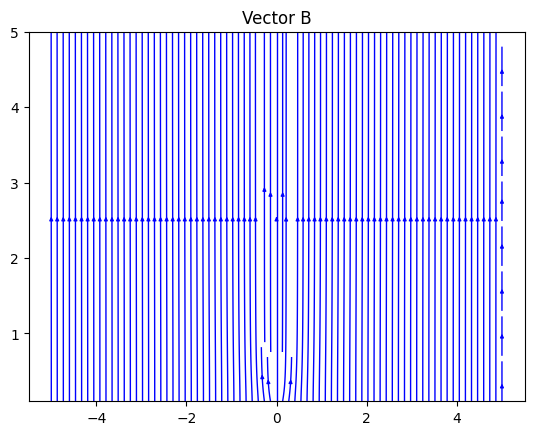

In [4]:
def loop_field(x, y, z, a, B_a):
    r = np.hypot(x, y)
    dplus = (a + r)**2 + z**2
    dminus = (a - r)**2 + z**2
    m = 4*a*r/dplus
    afac = B_a*a/(np.pi*np.sqrt(dplus))
    efac = (a**2 + r**2 + z**2)/dminus
    em = ellipe(m)
    km = ellipk(m)
    B_r  = afac*z/r*(efac*em - km)
    B_z  = afac    *(efac*em + km)
    # return B_r*x/r, B_r*y/r, B_z
    return B_r*x/r, B_z # (x, z) only
    
xmin, xmax = -5, 5
zmin, zmax = 0.1,5
npoints = 150
xx = np.linspace(xmin, xmax, npoints)
zz = np.linspace(zmin, zmax, npoints)
xx_grid, zz_grid = np.meshgrid(xx, zz)
Bx, Bz = loop_field(xx_grid, 0, zz_grid, 0.2, 1)
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)
ax.streamplot(xx_grid, zz_grid, Bx, Bz, density=2.5, color='b',
            linewidth=1, cmap=plt.cm.viridis, arrowsize=0.5)
ax.set_title('Vector B')
plt.show()